In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

## Reading the file

In [2]:
df=pd.read_csv("car details v4.csv")
df.sample(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
303,Honda,Amaze 1.5 S i-DTEC,295000,2014,62500,Diesel,Manual,Varanasi,Bronze,First,Individual,1498 cc,99 bhp @ 3600 rpm,200 Nm @ 1750 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
254,Hyundai,Grand i10 Magna 1.2 Kappa VTVT [2017-2020],445000,2016,22402,Petrol,Manual,Mumbai,Grey,First,Individual,1197 cc,81 bhp @ 6000 rpm,114 Nm @ 4000 rpm,FWD,3765.0,1660.0,1520.0,5.0,43.0
1295,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3090000,2017,52000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0
214,Audi,RS5 4.2 Coupe,3650000,2012,25500,Petrol,Automatic,Mumbai,Blue,Second,Corporate,4163 cc,444 bhp @ 8250 rpm,430 Nm @ 4000 rpm,AWD,4649.0,1860.0,1366.0,5.0,64.0
1690,Toyota,Innova 2.4 VX 8 STR [2016-2020],1998999,2019,71063,Diesel,Manual,Navi Mumbai,Silver,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,8.0,55.0


## Understanding the Data

In [3]:
df.shape

(2059, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

### To Check The Duplicates

In [5]:
df[df.duplicated()]

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity


In [6]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [7]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical         continuous
------------------  ------------
Make                Model
Year                Price
Fuel Type           Kilometer
Transmission        Engine
Location            Max Power
Color               Max Torque
Owner               Length
Seller Type         Width
Drivetrain          Height
Seating Capacity
Fuel Tank Capacity


In [8]:
print(str(df['Make'].value_counts().to_frame()) + '\n')
print(str(df['Year'].value_counts().to_frame()) + '\n')
print(str(df['Fuel Type'].value_counts().to_frame()) + '\n')
print(str(df['Owner'].value_counts().to_frame()) + '\n')
print(str(df['Location'].value_counts().to_frame()) + '\n')


               Make
Maruti Suzuki   440
Hyundai         349
Mercedes-Benz   171
Honda           158
Toyota          132
Audi            127
BMW             121
Mahindra        119
Tata             57
Volkswagen       50
Ford             48
Renault          43
Skoda            40
Land Rover       33
Kia              23
Jeep             18
Jaguar           17
MG               17
Nissan           16
Volvo            16
Porsche          15
MINI             11
Datsun            8
Chevrolet         7
Lexus             6
Mitsubishi        4
Ssangyong         3
Rolls-Royce       3
Isuzu             2
Fiat              2
Maserati          1
Ferrari           1
Lamborghini       1

      Year
2018   268
2017   262
2019   218
2014   192
2016   187
2015   178
2021   156
2020   132
2013   128
2012    92
2022    81
2011    79
2009    33
2010    27
2008    13
2007     6
2006     2
2004     1
2002     1
1988     1
2000     1
1996     1

              Fuel Type
Diesel             1049
Petrol           

### Defining function for checking categorical data

In [9]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
      

In [10]:
info_of_cat('Engine')

Unique values in Engine are: ['1198 cc' '1248 cc' '1197 cc' '2393 cc' '1373 cc' '1991 cc' '1995 cc'
 '1798 cc' '1461 cc' '999 cc' '1462 cc' '1956 cc' '998 cc' '796 cc'
 '1591 cc' '1086 cc' '1199 cc' '1582 cc' nan '1047 cc' '2143 cc' '1968 cc'
 '1796 cc' '2498 cc' '2494 cc' '2179 cc' '1998 cc' '1497 cc' '1196 cc'
 '2755 cc' '1799 cc' '1493 cc' '1399 cc' '1498 cc' '1997 cc' '1598 cc'
 '2993 cc' '2995 cc' '2982 cc' '1353 cc' '1984 cc' '2967 cc' '2609 cc'
 '1950 cc' '1999 cc' '4663 cc' '1451 cc' '2354 cc' '1396 cc' '2987 cc'
 '2997 cc' '1336 cc' '4163 cc' '3496 cc' '799 cc' '2979 cc' '4806 cc'
 '2996 cc' '1061 cc' '2184 cc' '2497 cc' '2999 cc' '1948 cc' '3436 cc'
 '2925 cc' '2489 cc' '1368 cc' '1797 cc' '1298 cc' '2694 cc' '1186 cc'
 '1364 cc' '3498 cc' '3982 cc' '1120 cc' '2523 cc' '1988 cc' '3902 cc'
 '624 cc' '2477 cc' '3198 cc' '5204 cc' '814 cc' '2953 cc' '1496 cc'
 '1499 cc' '1996 cc' '5461 cc' '1395 cc' '2835 cc' '2148 cc' '2696 cc'
 '1794 cc' '1969 cc' '6592 cc' '2199 cc' '4951 cc'

In [11]:
df['Engine'] = df['Engine'].str.replace(' cc', '')
df['Engine']

0       1198
1       1248
2       1197
3       1197
4       2393
        ... 
2054    2179
2055     814
2056    1196
2057    1995
2058    1493
Name: Engine, Length: 2059, dtype: object

In [12]:
info_of_cat('Engine')

Unique values in Engine are: ['1198' '1248' '1197' '2393' '1373' '1991' '1995' '1798' '1461' '999'
 '1462' '1956' '998' '796' '1591' '1086' '1199' '1582' nan '1047' '2143'
 '1968' '1796' '2498' '2494' '2179' '1998' '1497' '1196' '2755' '1799'
 '1493' '1399' '1498' '1997' '1598' '2993' '2995' '2982' '1353' '1984'
 '2967' '2609' '1950' '1999' '4663' '1451' '2354' '1396' '2987' '2997'
 '1336' '4163' '3496' '799' '2979' '4806' '2996' '1061' '2184' '2497'
 '2999' '1948' '3436' '2925' '2489' '1368' '1797' '1298' '2694' '1186'
 '1364' '3498' '3982' '1120' '2523' '1988' '3902' '624' '2477' '3198'
 '5204' '814' '2953' '1496' '1499' '1996' '5461' '1395' '2835' '2148'
 '2696' '1794' '1969' '6592' '2199' '4951' '1495' '2487' '2998' '2198'
 '2157' '1595' '1586' '936' '1332' '2400' '793' '995']
Mode of Engine is 1197
Number of missing values in Engine is 80


In [13]:
df['Engine'] = df['Engine'].astype('Int64')

### Defining function to check the numerical data

In [14]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [15]:
info_of_numerical('Engine')

The mean of the Engine is 1692.5755432036383
The median of the Engine is 1498.0
The mode of the Engine is 1197
The standard deviation of the Engine is 643.7362940735346
Number of missing values in the Engine is 80


In [16]:
engine_med = df['Engine'].median()
print(engine_med)
df["Engine"].fillna(engine_med, inplace = True)

1498.0


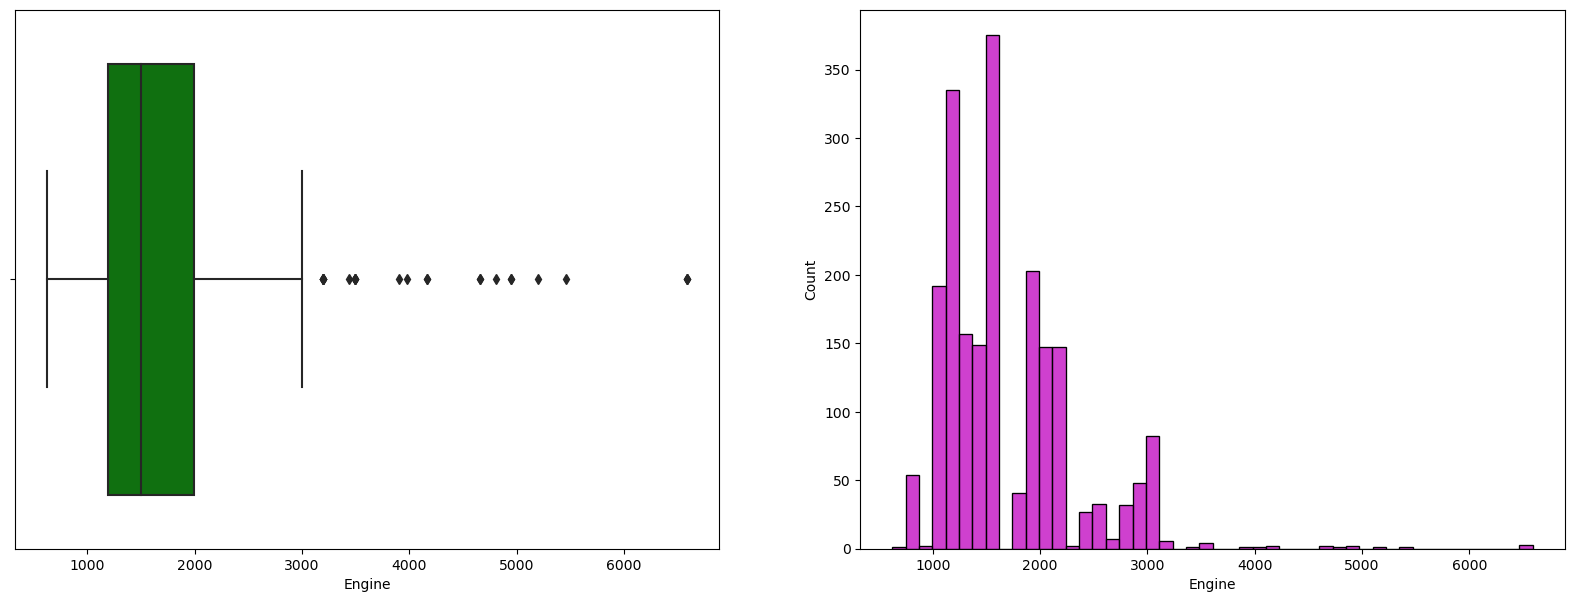

In [17]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Engine"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Engine"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [18]:
print(df['Engine'].value_counts().sort_values(ascending=False).to_frame())

      Engine
1197     231
1498     144
1248     122
998      121
1497      84
...      ...
4806       1
3496       1
2609       1
5204       1
995        1

[108 rows x 1 columns]


In [19]:
df[df['Engine']>3500].value_counts().sum()

13

In [20]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [21]:
info_of_cat('Max Power')

Unique values in Max Power are: ['87 bhp @ 6000 rpm' '74 bhp @ 4000 rpm' '79 bhp @ 6000 rpm'
 '82 bhp @ 6000 rpm' '148 bhp @ 3400 rpm' '91 bhp @ 6000 rpm'
 '181 bhp @ 5500 rpm' '188 bhp @ 4000 rpm' '177 bhp @ 5100 rpm'
 '84 bhp @ 3750 rpm' '67 bhp @ 5500 rpm' '103 bhp @ 6000 rpm'
 '138 bhp @ 3750 rpm' '103 bhp @ 5000 rpm' '67 bhp @ 6000 rpm'
 '47 bhp @ 6000 rpm' '122 bhp @ 6400 rpm' '68 bhp @ 5500 rpm'
 '118 bhp @ 6000 rpm' '58 bhp @ 6000 rpm' '85 bhp @ 6000 rpm'
 '89 bhp @ 6000 rpm' '126 bhp @ 4000 rpm' '124 bhp @ 6000 rpm' nan
 '62 bhp @ 5500 rpm' '84 bhp @ 6000 rpm' '69 bhp @ 4000 rpm'
 '168 bhp @ 3000 rpm' '203 bhp @ 4200 rpm' '138 bhp @ 6400 rpm'
 '177 bhp @ 4200 rpm' '165@5500' '105 bhp @ 3800 rpm' '83 bhp @ 6000 rpm'
 '89 bhp @ 4000 rpm' '169 bhp @ 3750 rpm' '101 bhp @ 3600 rpm'
 '190 bhp @ 4000 rpm' '171 bhp @ 3750 rpm' '120 bhp @ 4000 rpm'
 '181 bhp @ 5000 rpm' '117 bhp @ 6600 rpm' '74 bhp @ 4200 rpm'
 '73 bhp @ 6000 rpm' '184 bhp @ 4000 rpm' '174 bhp @ 3400 rpm'
 '130 bhp @ 6

In [22]:
df[["max_power_value", "max_power_unit", "max_power_info"]] = df["Max Power"].str.split(" ", n=2, expand=True)


In [23]:
df[["at","rpm", "unit"]] = df["max_power_info"].str.split(" ", n=2, expand =True)


In [24]:
df["max_power_value"] = pd.to_numeric(df["max_power_value"], errors="coerce")
df["rpm"] = pd.to_numeric(df["rpm"], errors="coerce")
df["Max Power"] = df["max_power_value"]

In [25]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Width,Height,Seating Capacity,Fuel Tank Capacity,max_power_value,max_power_unit,max_power_info,at,rpm,unit
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,1680.0,1505.0,5.0,35.0,87.0,bhp,@ 6000 rpm,@,6000.0,rpm
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,1695.0,1555.0,5.0,42.0,74.0,bhp,@ 4000 rpm,@,4000.0,rpm
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,1595.0,1550.0,5.0,35.0,79.0,bhp,@ 6000 rpm,@,6000.0,rpm
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,1745.0,1510.0,5.0,37.0,82.0,bhp,@ 6000 rpm,@,6000.0,rpm
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,1830.0,1795.0,7.0,55.0,148.0,bhp,@ 3400 rpm,@,3400.0,rpm


In [26]:
df=df.drop(['max_power_unit','max_power_info','max_power_value','at','rpm','unit'],axis=1)
df.head()


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198,87.0,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248,74.0,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197,79.0,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197,82.0,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393,148.0,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [27]:
df['Max Power'].value_counts()

89.0     139
67.0      89
82.0      62
74.0      61
126.0     55
        ... 
265.0      1
162.0      1
195.0      1
165.0      1
329.0      1
Name: Max Power, Length: 151, dtype: int64

In [28]:
info_of_numerical('Max Power')

The mean of the Max Power is 131.0873110151188
The median of the Max Power is 117.0
The mode of the Max Power is 89.0
The standard deviation of the Max Power is 65.63564347300996
Number of missing values in the Max Power is 207


In [29]:
max_power_value_med = df['Max Power'].median()
print(max_power_value_med)
df["Max Power"].fillna(max_power_value_med, inplace = True)

117.0


In [30]:
info_of_numerical('Max Power')

The mean of the Max Power is 129.6710539096649
The median of the Max Power is 117.0
The mode of the Max Power is 117.0
The standard deviation of the Max Power is 62.39131461481572
Number of missing values in the Max Power is 0


In [31]:
df['Max Power'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2059 entries, 0 to 2058
Series name: Max Power
Non-Null Count  Dtype  
--------------  -----  
2059 non-null   float64
dtypes: float64(1)
memory usage: 16.2 KB


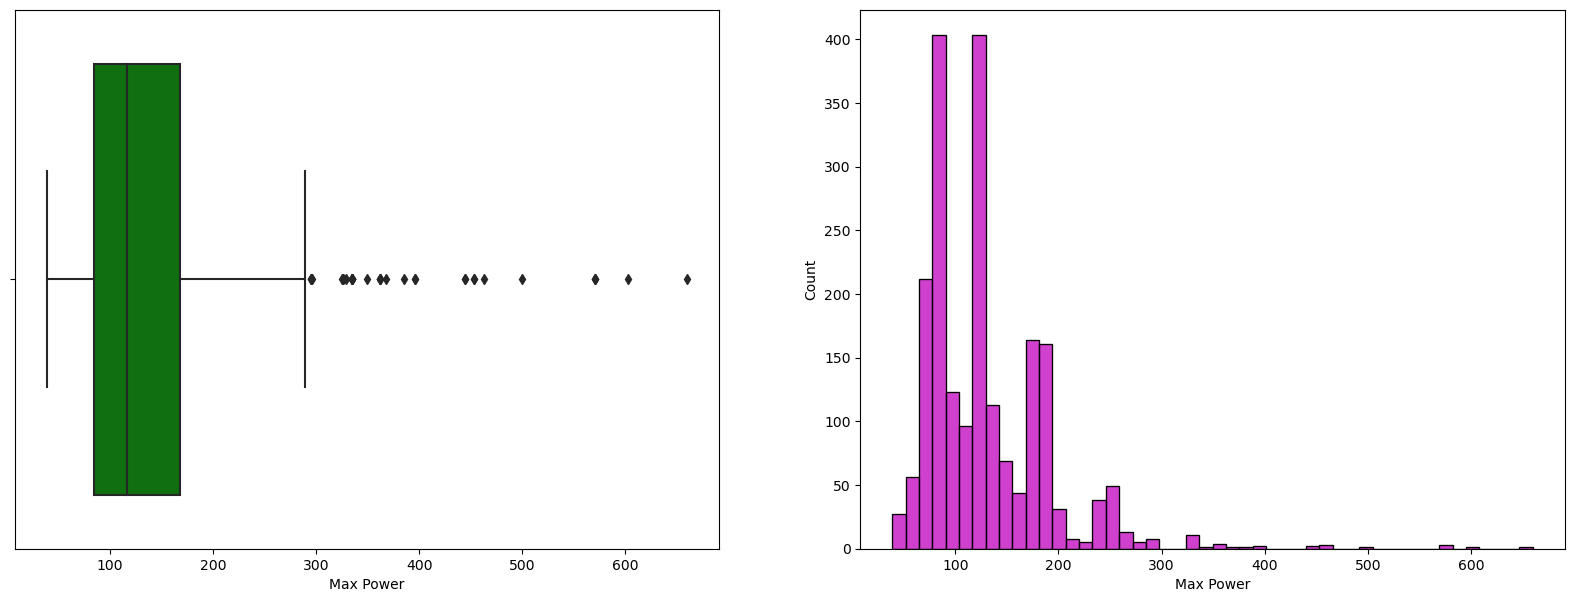

In [32]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Max Power"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Max Power"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [33]:
info_of_cat('Max Torque')

Unique values in Max Torque are: ['109 Nm @ 4500 rpm' '190 Nm @ 2000 rpm' '112.7619 Nm @ 4000 rpm'
 '113 Nm @ 4200 rpm' '343 Nm @ 1400 rpm' '130 Nm @ 4000 rpm'
 '300 Nm @ 1200 rpm' '400 Nm @ 1750 rpm' '250 Nm @ 1250 rpm'
 '200 Nm @ 1900 rpm' '115 Nm @ 4000 rpm' '91 Nm @ 4250 rpm'
 '138 Nm @ 4400 rpm' '350 Nm @ 1750 rpm' '175 Nm @ 1500 rpm'
 '90 Nm @ 3500 rpm' '69 Nm @ 3500 rpm' '154 Nm @ 4850 rpm'
 '153 Nm @ 3800 rpm' '99 Nm @ 4500 rpm' '172 Nm @ 1500 rpm'
 '78 Nm @ 3500 rpm' '113 Nm @ 4500 rpm' '110 Nm @ 4800 rpm'
 '265 Nm @ 1900 rpm' '170 Nm @ 1400 rpm' nan '96 Nm @ 3000 rpm'
 '114 Nm @ 3500 rpm' '140 Nm @ 1800 rpm' '400 Nm @ 1400 rpm'
 '260 Nm @ 1500 rpm' '500 Nm @ 1600 rpm' '173 Nm @ 4000 rpm'
 '380 Nm @ 1750 rpm' '240@3000' '247 Nm @ 1800 rpm' '200 Nm @ 1750 rpm'
 '200 Nm @ 1200 rpm' '290 Nm @ 1800 rpm' '270 Nm @ 1350 rpm'
 '145 Nm @ 4600 rpm' '180 Nm @ 2000 rpm' '101 Nm @ 3000 rpm'
 '112 Nm @ 4000 rpm' '450 Nm @ 1600 rpm' '171.62 Nm @ 4300 rpm'
 '113 Nm @ 4400 rpm' '240 Nm @ 1500

In [34]:
df[["max_torque_value", "max_torque_unit", "max_torque_info"]] = df["Max Torque"].str.split(" ", n=2, expand=True)

In [35]:
df[["at","rpm", "unit"]] = df["max_torque_info"].str.split(" ", n=2, expand =True)

In [36]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Width,Height,Seating Capacity,Fuel Tank Capacity,max_torque_value,max_torque_unit,max_torque_info,at,rpm,unit
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,1680.0,1505.0,5.0,35.0,109,Nm,@ 4500 rpm,@,4500,rpm
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,1695.0,1555.0,5.0,42.0,190,Nm,@ 2000 rpm,@,2000,rpm
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,1595.0,1550.0,5.0,35.0,112.7619,Nm,@ 4000 rpm,@,4000,rpm
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,1745.0,1510.0,5.0,37.0,113,Nm,@ 4200 rpm,@,4200,rpm
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,1830.0,1795.0,7.0,55.0,343,Nm,@ 1400 rpm,@,1400,rpm


In [37]:
df["max_torque_value"] = pd.to_numeric(df["max_torque_value"], errors="coerce")
df["rpm"] = pd.to_numeric(df["rpm"], errors="coerce")
df["Max Torque"] = df["max_torque_value"]

In [38]:
df = df.drop(["max_torque_value", "max_torque_unit", "max_torque_info", "at", "unit"], axis =1)
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,1198,87.0,109.0000,FWD,3990.0,1680.0,1505.0,5.0,35.0,4500.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,1248,74.0,190.0000,FWD,3995.0,1695.0,1555.0,5.0,42.0,2000.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,1197,79.0,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0,4000.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,1197,82.0,113.0000,FWD,3995.0,1745.0,1510.0,5.0,37.0,4200.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,2393,148.0,343.0000,RWD,4735.0,1830.0,1795.0,7.0,55.0,1400.0


In [39]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'rpm'],
      dtype='object')

In [40]:
for column_name in df.columns:
    unique_count = df[column_name].nunique()
    print("Column:", column_name ," - ",unique_count)
    #print(unique_count)
    print()


Column: Make  -  33

Column: Model  -  1050

Column: Price  -  619

Column: Year  -  22

Column: Kilometer  -  847

Column: Fuel Type  -  9

Column: Transmission  -  2

Column: Location  -  77

Column: Color  -  17

Column: Owner  -  6

Column: Seller Type  -  3

Column: Engine  -  108

Column: Max Power  -  151

Column: Max Torque  -  127

Column: Drivetrain  -  3

Column: Length  -  248

Column: Width  -  170

Column: Height  -  196

Column: Seating Capacity  -  6

Column: Fuel Tank Capacity  -  55

Column: rpm  -  51



In [41]:
df=df.drop(['Model','rpm'],axis=1)
df.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198,87.0,109.0000,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248,74.0,190.0000,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197,79.0,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197,82.0,113.0000,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393,148.0,343.0000,RWD,4735.0,1830.0,1795.0,7.0,55.0


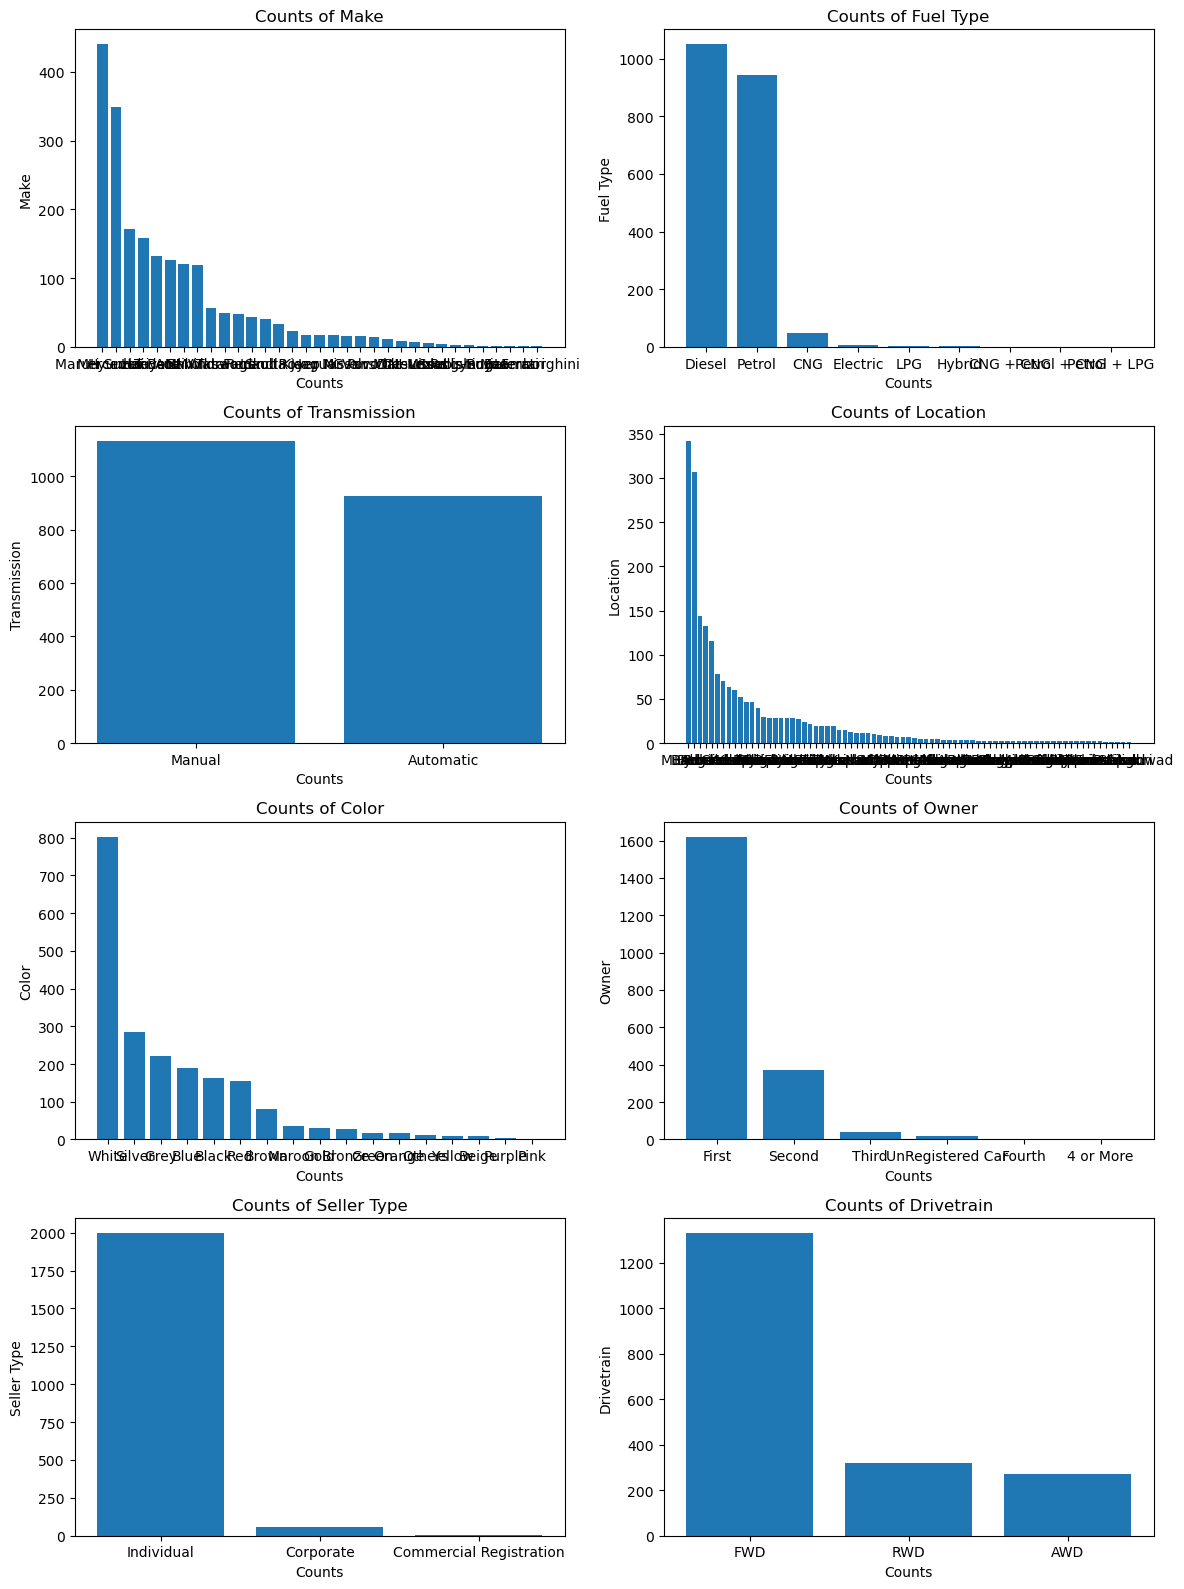

In [42]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
features = ['Make','Fuel Type','Transmission','Location','Color','Owner','Seller Type','Drivetrain']

# Create subplots
fig, axes = plt.subplots(4,2, figsize=(12, 16))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot bar graphs for each feature
for i, feature in enumerate(features):
    counts = df[feature].value_counts()
    ax = axes[i]  # Select the current subplot
    ax.bar(counts.index, counts.values)
    ax.set_xlabel('Counts')
    ax.set_ylabel(feature)
    ax.set_title(f'Counts of {feature}')

# Remove any unused subplots
if len(features) < 8:
    for j in range(len(features), 8):
        fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [43]:
df=df.drop(['Seller Type'],axis=1)

In [44]:
df.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,1198,87.0,109.0000,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,1248,74.0,190.0000,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,1197,79.0,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,1197,82.0,113.0000,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,2393,148.0,343.0000,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [45]:
df.isnull().sum()

Make                    0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Engine                  0
Max Power               0
Max Torque            207
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [46]:
info_of_numerical('Max Torque')

The mean of the Max Torque is 249.59242300215976
The median of the Max Torque is 204.0
The mode of the Max Torque is 200.0
The standard deviation of the Max Torque is 140.82684827618795
Number of missing values in the Max Torque is 207


In [47]:
max_torque = df['Max Torque'].median()
print(max_torque)
df["Max Torque"].fillna(max_torque, inplace = True)

204.0


In [48]:
info_of_numerical('Max Torque')

The mean of the Max Torque is 245.00882340942192
The median of the Max Torque is 204.0
The mode of the Max Torque is 204.0
The standard deviation of the Max Torque is 134.25899028266332
Number of missing values in the Max Torque is 0


In [49]:
info_of_cat('Drivetrain')

Unique values in Drivetrain are: ['FWD' 'RWD' 'AWD' nan]
Mode of Drivetrain is FWD
Number of missing values in Drivetrain is 136


In [50]:
drivetrain_mode = df.Drivetrain.mode()[0]
print(drivetrain_mode)
df["Drivetrain"].fillna(drivetrain_mode, inplace = True)

FWD


In [51]:
info_of_cat('Drivetrain')

Unique values in Drivetrain are: ['FWD' 'RWD' 'AWD']
Mode of Drivetrain is FWD
Number of missing values in Drivetrain is 0


In [52]:
info_of_numerical('Length')

The mean of the Length is 4280.860651629073
The median of the Length is 4370.0
The mode of the Length is 3995.0
The standard deviation of the Length is 442.4585067791562
Number of missing values in the Length is 64


In [53]:
length = df['Length'].median()
print(length)
df["Length"].fillna(length, inplace = True)

4370.0


In [54]:
info_of_numerical('Width')

The mean of the Width is 1767.9919799498746
The median of the Width is 1770.0
The mode of the Width is 1695.0
The standard deviation of the Width is 135.26582519704763
Number of missing values in the Width is 64


In [55]:
width = df['Width'].median()
print(width)
df["Width"].fillna(width, inplace = True)

1770.0


In [56]:
info_of_numerical('Height')

The mean of the Height is 1591.7353383458646
The median of the Height is 1545.0
The mode of the Height is 1475.0
The standard deviation of the Height is 136.07395597176128
Number of missing values in the Height is 64


In [57]:
height = df['Height'].median()
print(height)
df["Height"].fillna(height, inplace = True)

1545.0


In [58]:
info_of_numerical('Seating Capacity')

The mean of the Seating Capacity is 5.306265664160401
The median of the Seating Capacity is 5.0
The mode of the Seating Capacity is 5.0
The standard deviation of the Seating Capacity is 0.8221701349425085
Number of missing values in the Seating Capacity is 64


In [59]:
seating = df['Seating Capacity'].median()
print(seating)
df["Seating Capacity"].fillna(seating, inplace = True)

5.0


In [60]:
info_of_numerical('Fuel Tank Capacity')

The mean of the Fuel Tank Capacity is 52.00220966084275
The median of the Fuel Tank Capacity is 50.0
The mode of the Fuel Tank Capacity is 35.0
The standard deviation of the Fuel Tank Capacity is 15.1101977941091
Number of missing values in the Fuel Tank Capacity is 113


In [61]:
tank = df['Fuel Tank Capacity'].median()
print(tank)
df["Fuel Tank Capacity"].fillna(tank, inplace = True)

50.0


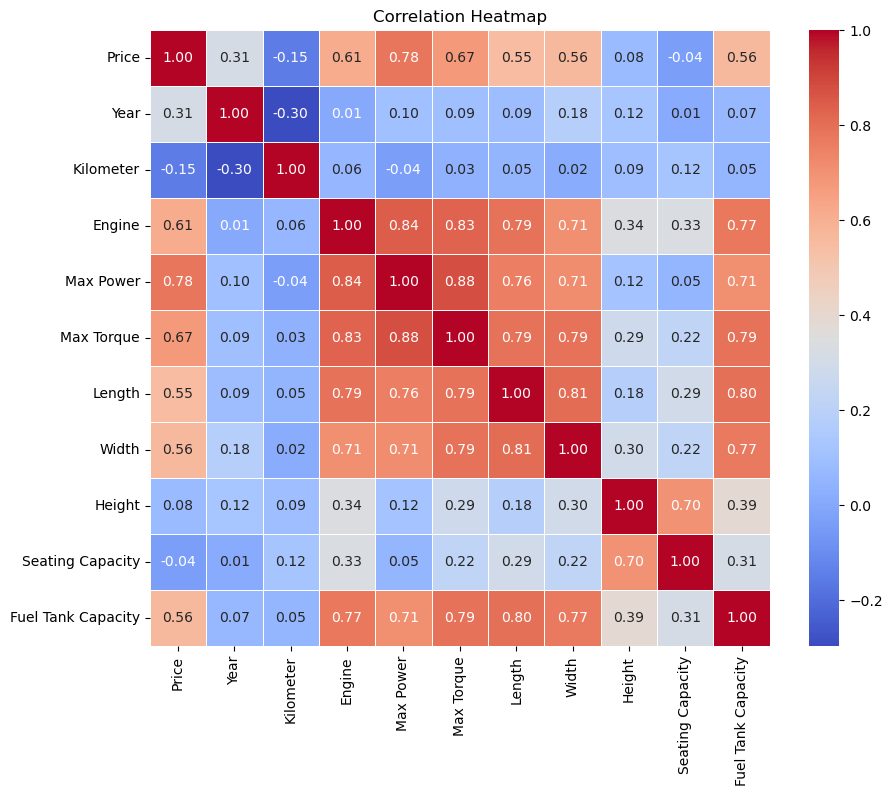

In [62]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)
plt.title("Correlation Heatmap")
plt.show()

In [63]:
df=df.drop(['Seating Capacity','Height'],axis=1)

In [64]:
df.shape

(2059, 16)

In [65]:
df.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,1198,87.0,109.0000,FWD,3990.0,1680.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,1248,74.0,190.0000,FWD,3995.0,1695.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,1197,79.0,112.7619,FWD,3585.0,1595.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,1197,82.0,113.0000,FWD,3995.0,1745.0,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,2393,148.0,343.0000,RWD,4735.0,1830.0,55.0


In [66]:
df_dummy=pd.get_dummies(df,drop_first=True)
df_dummy.head()

,Price,Year,Kilometer,Engine,Max Power,Max Torque,Length,Width,Fuel Tank Capacity,Make_BMW,...,Color_Silver,Color_White,Color_Yellow,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Drivetrain_FWD,Drivetrain_RWD
0,505000,2017,87150,1198,87.0,109.0000,3990.0,1680.0,35.0,0,...,0,0,0,1,0,0,0,0,1,0
1,450000,2014,75000,1248,74.0,190.0000,3995.0,1695.0,42.0,0,...,0,1,0,0,0,1,0,0,1,0
2,220000,2011,67000,1197,79.0,112.7619,3585.0,1595.0,35.0,0,...,0,0,0,1,0,0,0,0,1,0
3,799000,2019,37500,1197,82.0,113.0000,3995.0,1745.0,37.0,0,...,0,0,0,1,0,0,0,0,1,0
4,1950000,2018,69000,2393,148.0,343.0000,4735.0,1830.0,55.0,0,...,0,0,0,1,0,0,0,0,0,1


In [67]:
X=df_dummy.drop('Price',axis=1)
y=df_dummy['Price']

In [68]:
X.head()

,Year,Kilometer,Engine,Max Power,Max Torque,Length,Width,Fuel Tank Capacity,Make_BMW,Make_Chevrolet,...,Color_Silver,Color_White,Color_Yellow,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Drivetrain_FWD,Drivetrain_RWD
0,2017,87150,1198,87.0,109.0000,3990.0,1680.0,35.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2014,75000,1248,74.0,190.0000,3995.0,1695.0,42.0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,2011,67000,1197,79.0,112.7619,3585.0,1595.0,35.0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,2019,37500,1197,82.0,113.0000,3995.0,1745.0,37.0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2018,69000,2393,148.0,343.0000,4735.0,1830.0,55.0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [70]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
y_pred

array([-4.17707775e+05, -7.86342866e+05, -1.75189265e+05,  9.88066530e+05,
        4.44561523e+05,  9.72976049e+05,  1.84832250e+06,  2.75561098e+06,
        2.07712936e+06,  4.00413542e+06,  3.89857297e+05,  4.13510769e+06,
        1.47369896e+06,  1.38037381e+06,  1.11583507e+06,  3.17898974e+05,
        2.72778580e+06,  1.48961401e+05, -3.79576151e+05,  2.37085416e+05,
        1.79200237e+06,  3.58502302e+06,  6.88733027e+04,  1.12674234e+06,
        4.53968531e+06,  1.22630586e+06,  3.27566203e+06,  2.40797583e+06,
        6.09041041e+05,  2.79764273e+05,  2.21893794e+06,  8.90318306e+05,
        1.84375977e+06,  4.94686981e+06,  1.30582948e+06,  6.74599354e+05,
        1.11231228e+06,  1.07724616e+06,  5.33432627e+06,  2.18944136e+06,
        6.60904989e+06,  7.65801629e+06,  1.70745608e+05,  2.68186347e+05,
        2.37366469e+06,  8.18450912e+05,  1.74892107e+06, -5.97697316e+04,
        1.08510124e+06, -4.05944380e+05,  1.02442490e+07,  1.21076524e+06,
        1.85845214e+06,  

In [71]:
y_test

1826     240000
1505     155000
1994     180000
1349     625000
781      484999
         ...   
1236    1395000
1426    3100000
22       589000
574     1195000
45       625000
Name: Price, Length: 618, dtype: int64

In [72]:
print(reg.score(X,y)*100)

76.73647081292326


In [73]:
df.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,1198,87.0,109.0000,FWD,3990.0,1680.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,1248,74.0,190.0000,FWD,3995.0,1695.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,1197,79.0,112.7619,FWD,3585.0,1595.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,1197,82.0,113.0000,FWD,3995.0,1745.0,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,2393,148.0,343.0000,RWD,4735.0,1830.0,55.0


In [74]:
independent=df.drop('Price',axis=1)
corr=independent.corr()


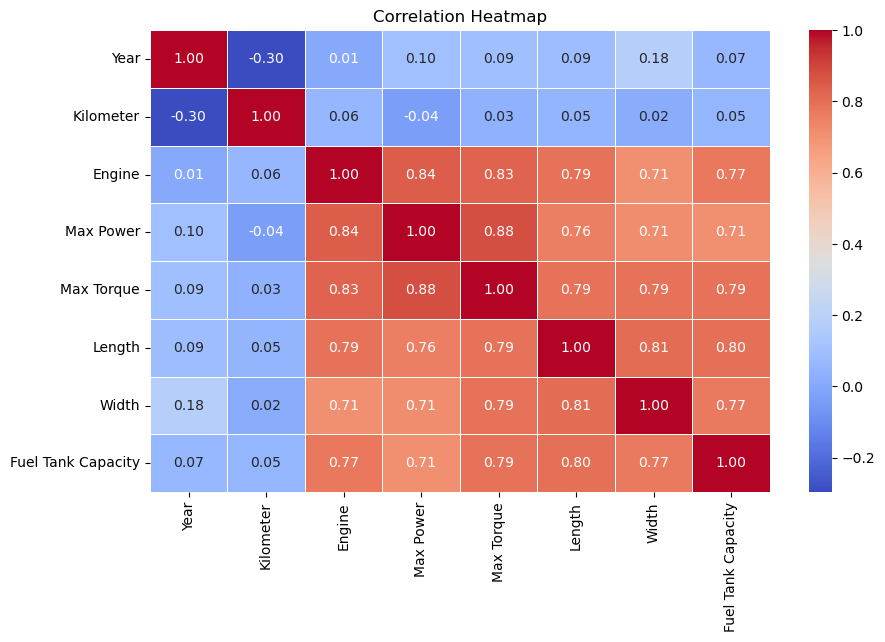

In [75]:

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)
plt.title("Correlation Heatmap")
plt.show()

In [76]:
df=df.drop(['Engine','Max Torque'],axis=1)
df

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Max Power,Drivetrain,Length,Width,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,87.0,FWD,3990.0,1680.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,74.0,FWD,3995.0,1695.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,79.0,FWD,3585.0,1595.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,82.0,FWD,3995.0,1745.0,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,148.0,RWD,4735.0,1830.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Manual,Surat,White,First,138.0,FWD,4585.0,1890.0,70.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,55.0,FWD,3495.0,1550.0,32.0
2056,Ford,240000,2013,73000,Petrol,Manual,Thane,Silver,First,70.0,FWD,3795.0,1680.0,45.0
2057,BMW,4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,188.0,RWD,4936.0,1868.0,65.0


In [77]:
df=df.drop(['Kilometer'],axis=1)

In [78]:
df=df.drop(['Location'],axis=1)

In [79]:
df=df.drop(['Length','Width'],axis=1)

In [80]:
df_dummy=pd.get_dummies(df,drop_first=True)
df_dummy.head()

,Price,Year,Max Power,Fuel Tank Capacity,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Ferrari,Make_Fiat,Make_Ford,...,Color_Silver,Color_White,Color_Yellow,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Drivetrain_FWD,Drivetrain_RWD
0,505000,2017,87.0,35.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,450000,2014,74.0,42.0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,220000,2011,79.0,35.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,799000,2019,82.0,37.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1950000,2018,148.0,55.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [81]:
X=df_dummy.drop('Price',axis=1)
y=df_dummy['Price']

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [83]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
y_pred

array([-3.08933566e+05, -1.17217655e+06, -5.57623778e+05,  1.02636187e+06,
        7.03567059e+05,  1.08050330e+06,  1.76557345e+06,  2.60623357e+06,
        2.07414518e+06,  3.65738178e+06,  4.35362622e+05,  3.93688466e+06,
        1.26961316e+06,  1.46215413e+06,  7.99812199e+05,  2.05250963e+04,
        2.65066223e+06,  3.78898135e+05, -1.92574205e+05,  2.38777336e+05,
        1.75198186e+06,  3.83681240e+06, -1.17086117e+05,  1.05335036e+06,
        5.05450195e+06,  9.94531829e+05,  3.40665839e+06,  2.35928271e+06,
        4.89080272e+05,  2.50738748e+05,  2.04137137e+06,  9.83132707e+05,
        1.71184445e+06,  5.01172130e+06,  1.41624485e+06,  3.08785160e+05,
        1.05410593e+06,  1.05067385e+06,  4.90074382e+06,  2.39110807e+06,
        6.43816494e+06,  8.71837638e+06,  4.45910217e+04, -1.36929437e+05,
        2.65066223e+06,  1.02217984e+06,  2.14148569e+06, -5.00389124e+04,
        3.83326947e+05, -3.75244325e+05,  9.75310051e+06,  9.12651603e+05,
        1.50951426e+06,  

In [84]:
print(reg.score(X,y)*100)

76.35363567519028


In [85]:
df.shape

(2059, 10)

In [86]:
df.head()

,Make,Price,Year,Fuel Type,Transmission,Color,Owner,Max Power,Drivetrain,Fuel Tank Capacity
0,Honda,505000,2017,Petrol,Manual,Grey,First,87.0,FWD,35.0
1,Maruti Suzuki,450000,2014,Diesel,Manual,White,Second,74.0,FWD,42.0
2,Hyundai,220000,2011,Petrol,Manual,Maroon,First,79.0,FWD,35.0
3,Toyota,799000,2019,Petrol,Manual,Red,First,82.0,FWD,37.0
4,Toyota,1950000,2018,Diesel,Manual,Grey,First,148.0,RWD,55.0


In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, OrdinalEncoder, PowerTransformer
import scipy.stats as stats

trf1 = ColumnTransformer([
    ("OHE", OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'), [0,3,4,5,8]),
    ("OE", OrdinalEncoder(), [6]),
    ("log", PowerTransformer(),[1,2,7,9])
],  remainder='passthrough')

In [88]:
df_transformed = trf1.fit_transform(X)

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [90]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = regressor.predict(X_test)
print("Predicted Prices:", y_pred)

Predicted Prices: [-3.08933566e+05 -1.17217655e+06 -5.57623778e+05  1.02636187e+06
  7.03567059e+05  1.08050330e+06  1.76557345e+06  2.60623357e+06
  2.07414518e+06  3.65738178e+06  4.35362622e+05  3.93688466e+06
  1.26961316e+06  1.46215413e+06  7.99812199e+05  2.05250963e+04
  2.65066223e+06  3.78898135e+05 -1.92574205e+05  2.38777336e+05
  1.75198186e+06  3.83681240e+06 -1.17086117e+05  1.05335036e+06
  5.05450195e+06  9.94531829e+05  3.40665839e+06  2.35928271e+06
  4.89080272e+05  2.50738748e+05  2.04137137e+06  9.83132707e+05
  1.71184445e+06  5.01172130e+06  1.41624485e+06  3.08785160e+05
  1.05410593e+06  1.05067385e+06  4.90074382e+06  2.39110807e+06
  6.43816494e+06  8.71837638e+06  4.45910217e+04 -1.36929437e+05
  2.65066223e+06  1.02217984e+06  2.14148569e+06 -5.00389124e+04
  3.83326947e+05 -3.75244325e+05  9.75310051e+06  9.12651603e+05
  1.50951426e+06  2.29484052e+06 -3.18458917e+05  1.92013964e+06
  6.76320829e+06  3.02711559e+06  8.67138499e+05  2.26132791e+06
  3.445

In [92]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7085594255775387

In [93]:
print(reg.score(X,y)*100)

76.35363567519028


In [94]:
import statsmodels.api as sm

X_train_ols = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_ols)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     81.70
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:11:02   Log-Likelihood:                -22089.
No. Observations:                1441   AIC:                         4.431e+04
Df Residuals:                    1377   BIC:                         4.464e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.88

## Conclusion:

### In conclusion, the linear regression model achieved a regression score of 76%. This indicates that the model was able to explain 76% of the variability in the target variable using the given features. While a score of 76% is relatively good, it is important to consider the context and the specific requirements of the problem at hand.

### The model's performance can be further evaluated by comparing it to other models or by considering the domain-specific implications. It is also crucial to assess the model's limitations and potential sources of error, such as outliers, multicollinearity, or heteroscedasticity, which may affect its accuracy and generalizability.

### Overall, while achieving a 76% regression score is a positive outcome, it is important to interpret the model's results in the context of the specific problem, consider its limitations, and continue refining and validating the model to improve its predictive capabilities.